Dieu My Nguyen <br>
CSCI 5448 <br>
Due: 01 February 2019

### Homework 1 Question 4

<i>Write a simple OO program that implements the Shape example discussed in Lecture 2 on slide 6 but using an OO design rather than the presented functional decomposition solution. 

Your program should simply print out (to the console) the number of shapes in the “database” and then ask each shape to “display itself” which will also cause a line of output to be generated to the console, one for each shape. 

The word “database” is in quotes in the previous sentence because you should not actually use a database to write this program. It is perfectly acceptable for your main program to create a collection of shapes before moving on to sorting that collection and displaying the shapes. 

Your program should support circles, triangles, and squares but should use polymorphism so that the main program doesn't know the type of shape it is dealing with, but instead treats shapes uniformly (similar to the example program in Lecture 2 that involved different types of students). </i>

### I. Imports

In [384]:
import numpy as np
import random
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
plt.rcParams["font.family"] = "Arial"

### II. Shapes Database

#### Example shapes

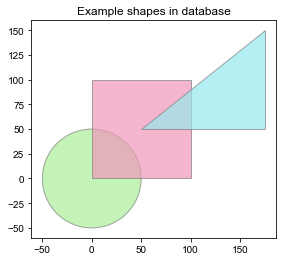

In [17]:
plt.axes()
circle = plt.Circle((0,0), radius=50, fc='#aaee97', alpha=0.7, edgecolor='gray')
square = plt.Rectangle((0,0), 100, 100, fc='#ee97ba', alpha=0.7, edgecolor='gray')
triangle_points = [[50, 50], [175, 50], [175, 150]]
triangle = plt.Polygon(triangle_points, fc='#97e9ee', alpha=0.7, edgecolor='gray')
plt.gca().add_patch(circle)
plt.gca().add_patch(square)
plt.gca().add_patch(triangle)
plt.axis('scaled')
plt.title('Example shapes in database')
plt.show()

#### Generate database as dictionary
Dictionary holds dimensions of shapes: circles, triangles, squares, etc. Making this database small to keep things simple, but the program should be able to support a bigger database.

In [578]:
shape_database = [{'z_order': 0, 'type': 'square', 'params': {'xy': (0,0), 'width': 100, 'height': 100, 'color': '#f9d3a4'}},
                   {'z_order': 1, 'type': 'square', 'params': {'xy': (5,5), 'width': 90, 'height': 90, 'color': '#f9d3a4'}},
                   {'z_order': 2, 'type': 'circle', 'params': {'xy': (50,50), 'radius': 40, 'color': '#f49e3a'}},
                   {'z_order': 3, 'type': 'circle', 'params': {'xy': (50,50), 'radius': 35, 'color': '#ffea2d'}},
                  ]

# Pepperonis
x = [50, 25, 35, 65, 50, 35, 55,  75, 55]
y = [25, 50, 65, 35, 65, 35, 80,  58, 50]
for i in range(len(x)):
    x_i = x[i]
    y_i = y[i]
    r = np.random.randint(3,5)
    color = '#930b0b'
    z_order = len(shape_database) + i
    shape_type = 'circle'
    circle_dict = {'z_order': z_order,
                   'type': shape_type,
                   'params': {'xy': (x_i, y_i),
                              'radius': r,
                              'color': color                       
                   }        
    }
    shape_database.append(circle_dict)

# Cheeses
xt = [50, 40, 70,  60, 35, 25, 40, 20, 65]
yt = [35, 50, 40,  50, 75, 40, 20, 60, 70]
for j in range(len(xt)):
    m = np.random.randint(2,4)
    n = m * 2
    points = [[xt[j], yt[j]], [xt[j]+m, yt[j]+n], [xt[j]+n, yt[j]]]
    color = '#f4edad'
    z_order = len(shape_database) + i
    shape_type = 'triangle'
    triangle_dict = {'z_order': z_order,
                   'type': shape_type,
                   'params': {'xy': (xt[j], yt[j]),
                              'points': points,
                              'color': color                       
                   }        
    }
    shape_database.append(triangle_dict)
    

### III. Object-oriented approach to display shapes

<i>Your program should simply print out (to the console) the number of shapes in the “database” and then ask each shape to “display itself” which will also cause a line of output to be generated to the console, one for each shape. </i>

In [553]:
class Shape(ABC):
    '''
    Abstract class with display() method that all subclasses will inherit.
    '''    
    @abstractmethod
    def display(self):
        pass

In [564]:
class Circle(Shape):
    def __init__(self, shape_info):
        self.xy = shape_info['xy']
        self.radius = shape_info['radius']
        self.color = shape_info['color']
        
    def display(self):
        print(f'Displaying a circle with radius {self.radius} and center at xy {self.xy}.')
        circle = plt.Circle(self.xy, radius=self.radius, fc=self.color, alpha=0.7)
        plt.gca().add_patch(circle)

In [565]:
class Square(Shape):
    def __init__(self, shape_info):
        self.xy = shape_info['xy']
        self.width = shape_info['width']
        self.height = shape_info['height']
        self.color = shape_info['color']
        
    def display(self):
        print(f'Displaying a square with side {self.width} and bottom-left corner at {self.xy}.')
        square = plt.Rectangle(self.xy, self.width, self.height, fc=self.color, alpha=0.7)
        plt.gca().add_patch(square)
        

In [582]:
class Triangle(Shape):
    def __init__(self, shape_info):
        self.points = shape_info['points']
        self.base = np.abs(self.points[0][0] - self.points[1][0])
        self.height = np.abs(self.points[1][1] - self.points[2][1])
        self.color = shape_info['color']
        
    def display(self):
        print(f'Displaying a triangle with base {self.base}, height {self.height}, starting vertex at {self.points[0]}.')
        triangle = plt.Polygon(self.points, fc=self.color, alpha=0.7, edgecolor='#f49e3a')   
        plt.gca().add_patch(triangle)

In [583]:
class Display():
    def display_shapes(self, shape_objects):
        plt.axes()
        for shape_obj in shape_objects:
            shape_obj.display()
        plt.axis('scaled')
        plt.show()

In [584]:
class Collection():
    def __init__(self):
        self.newlist = []
        self.shape_objects = []
        
    def sort(self, shape_database):
        # Sort by z-order (last on top)
        self.newlist = sorted(shape_database, key=lambda k: k['z_order']) 
    
    def display(self, shape_database, display_obj):
        # Instantiate shape objects and put in list
        classes_mapping = {"circle": Circle,
                           "square": Square,
                           "triangle": Triangle
                           }
        for shape in self.newlist:
            shape_obj = classes_mapping[shape['type']](shape['params'])
            self.shape_objects.append(shape_obj)
        
        # Tell contained shapes to display themselves in order
        display_obj.display_shapes(self.shape_objects)

Number of shapes in database: 22 

Displaying a square with side 100 and bottom-left corner at (0, 0).
Displaying a square with side 90 and bottom-left corner at (5, 5).
Displaying a circle with radius 40 and center at xy (50, 50).
Displaying a circle with radius 35 and center at xy (50, 50).
Displaying a circle with radius 4 and center at xy (50, 25).
Displaying a circle with radius 3 and center at xy (25, 50).
Displaying a circle with radius 3 and center at xy (35, 65).
Displaying a circle with radius 4 and center at xy (65, 35).
Displaying a circle with radius 3 and center at xy (50, 65).
Displaying a circle with radius 4 and center at xy (35, 35).
Displaying a circle with radius 4 and center at xy (55, 80).
Displaying a circle with radius 4 and center at xy (75, 58).
Displaying a circle with radius 4 and center at xy (55, 50).
Displaying a triangle with base 3, height 6, starting vertex at [50, 35].
Displaying a triangle with base 3, height 6, starting vertex at [40, 50].
Displayin

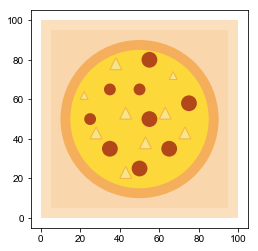

Pizza ready!


In [593]:
def main():    
    
    print(f'Number of shapes in database: {len(shape_database)} \n')
    
    # Instantiate a collection object to contain all shapes
    collection = Collection()     
    
    # Instantiate a display object to display all shapes of interest
    display_obj = Display()

    # Ask collection to sort the shapes alphabetically to define z-order
    collection.sort(shape_database)
    
    # The collection asks each shape to display itself in order
    # All shapes are displayed in the same figure with the display object
    collection.display(shape_database, display_obj)
    
    print(f'Pizza ready!')
    
if __name__ == "__main__":
    main()